In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from wordcloud import WordCloud

In [4]:
df = pd.read_csv('Cleaned_Data.csv')
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,excel,Extracted Skills,Educational Requirements,Company,State,Same State,Classified Size,Age_of_company,Num_Competitors,Revenue Numeric
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,1,"['Tableau', 'Excel', 'Python']",NaN,Tecolote Research,NM,0,Medium,51,1,75000000.0
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,0,"['Python', 'Java']",NaN,University of Maryland Medical System,MD,0,Enterprise,40,1,NaN
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,1,"['Python', 'SQL', 'Excel', 'D3.js']","Master's Degree, PhD",KnowBe4,FL,1,Medium,14,1,300000000.0
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,0,['Python'],NaN,PNNL,WA,1,Large,59,3,500000000.0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,1,"['SQL', 'Python']",NaN,Affinity Solutions,NY,1,Small,26,3,NaN


In [3]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'job_simp', 'Salary', 'Hourly_Pay', 'Employer_Provided',
       'Maximum Salary', 'Minimum Salary', 'Average Salary', 'python', 'scala',
       'java', 'sql', 'scikit-learn', 'tensorflow', 'keras', 'matplotlib',
       'tableau', 'powerbi', 'plotly', 'd3.js', 'apache spark', 'hadoop',
       'aws', 'google cloud', 'pandas', 'numpy', 'excel', 'Extracted Skills',
       'Educational Requirements', 'Company', 'State', 'Same State',
       'Classified Size', 'Age_of_company', 'Num_Competitors',
       'Revenue Numeric'],
      dtype='object')

In [4]:
df.describe()

,Rating,Founded,Hourly Pay,Employer Provided,Maximum Salary,Minimum Salary,Average Salary,python,scala,java,...,hadoop,aws,google cloud,pandas,numpy,excel,Same State,Age_of_company,Num_Competitors,Revenue Numeric
count,956.000000,956.000000,956.000000,956.000000,956.000000,742.000000,742.000000,956.000000,956.000000,956.000000,...,956.000000,956.000000,956.000000,956.000000,956.000000,956.000000,956.000000,956.000000,956.000000,3.740000e+02
mean,3.601255,1774.605649,0.025105,0.017782,99.687238,74.719677,100.626011,0.518828,0.210251,0.206067,...,0.160042,0.253138,0.038703,0.055439,0.038703,0.508368,0.514644,43.827406,1.584728,1.876270e+08
std,1.067619,598.942517,0.156525,0.132229,66.320935,30.980593,38.855948,0.499907,0.407700,0.404691,...,0.366837,0.435037,0.192987,0.228956,0.192987,0.500192,0.500047,50.683191,0.882724,1.819830e+08
min,-1.000000,-1.000000,0.000000,0.000000,1.000000,15.000000,13.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,1.000000,1.000000e+06
25%,3.300000,1937.000000,0.000000,0.000000,58.750000,52.000000,73.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,1.000000,2.250000e+07
50%,3.800000,1992.000000,0.000000,0.000000,110.000000,69.500000,97.500000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,25.000000,1.000000,7.500000e+07
75%,4.200000,2008.000000,0.000000,0.000000,143.000000,91.000000,122.500000,1.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,56.000000,3.000000,3.000000e+08
max,5.000000,2019.000000,1.000000,1.000000,306.000000,202.000000,254.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,280.000000,4.000000,5.000000e+08



<hr>


In [5]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'job_simp', 'Salary', 'Hourly Pay', 'Employer Provided',
       'Maximum Salary', 'Minimum Salary', 'Average Salary', 'python', 'scala',
       'java', 'sql', 'scikit-learn', 'tensorflow', 'keras', 'matplotlib',
       'tableau', 'powerbi', 'plotly', 'd3.js', 'apache spark', 'hadoop',
       'aws', 'google cloud', 'pandas', 'numpy', 'excel', 'Extracted Skills',
       'Educational Requirements', 'Company', 'State', 'Same State',
       'Classified Size', 'Age_of_company', 'Num_Competitors',
       'Revenue Numeric'],
      dtype='object')

<hr>

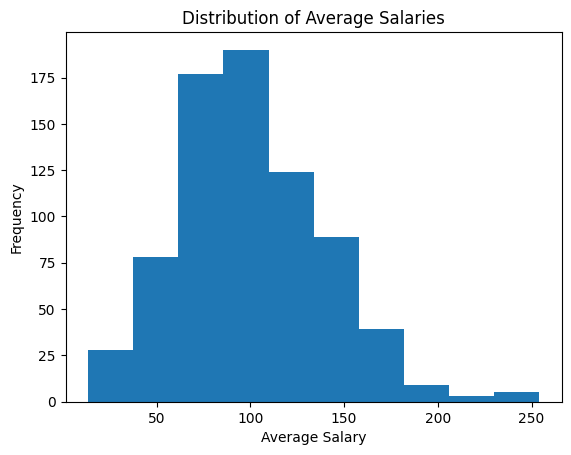

In [6]:
plt.hist(df['Average Salary'])
plt.title('Distribution of Average Salaries')
plt.xlabel('Average Salary')
plt.ylabel('Frequency')
plt.show()

### The observed distribution of average salaries appears to follow a normal distribution. This assumption is fundamental to the validity of the linear regression model. 

<hr>

<Axes: >

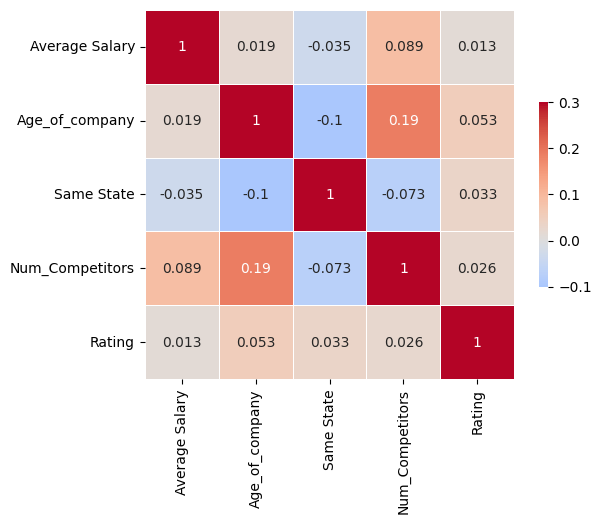

In [67]:
sns.heatmap(df[['Average Salary', 'Age_of_company', 'Same State', 'Num_Competitors','Rating']].corr(),annot=True, cmap="coolwarm", vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#### The heatmap shows that None of the correlations are strong, indicating that these variables do not have significant linear relationships with each other. 
#### The correlation between Num_Competitors and Age_of_company might indicate that older companies tend to face more competition.
#### The overall Analysis indicate that average salary, company age, location, Rating and number of competitors are largely independent of each other 

<hr>

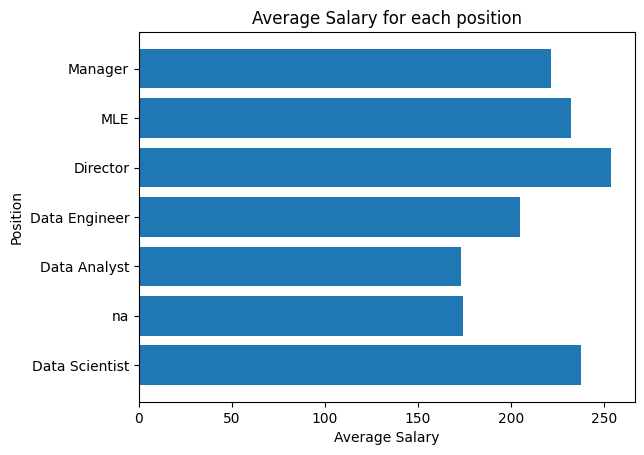

In [68]:
plt.barh(df['job_simp'], df['Average Salary'])
plt.title('Average Salary for each position')
plt.xlabel('Average Salary')
plt.ylabel('Position')
plt.show()

### While salaries exhibit a relatively narrow range overall, Director, Data Scientist, and Machine Learning Engineer roles consistently command higher compensation.

<hr>

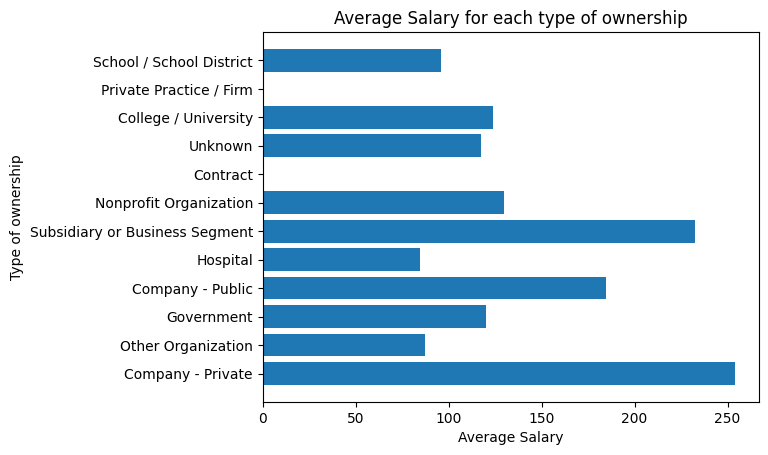

In [69]:
plt.barh(df['Type of ownership'], df['Average Salary'])
plt.title('Average Salary for each type of ownership')
plt.xlabel('Average Salary')
plt.ylabel('Type of ownership')
plt.show()

#### Salaries exhibit variation across companies, with private and business segment generally offering higher compensation than other sectors.

<hr>

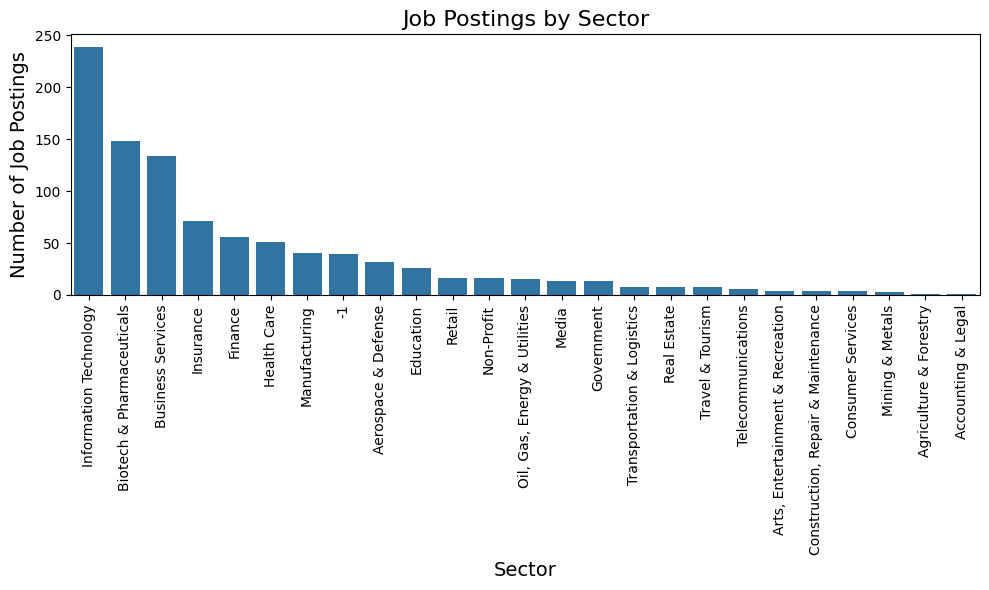

In [70]:
#sns.set(style='whitegrid')
#palette = sns.color_palette("Set2")
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='Sector', order = df['Sector'].value_counts().index)
ax.set_title('Job Postings by Sector', fontsize=16)
ax.set_xlabel('Sector', fontsize=14)
ax.set_ylabel('Number of Job Postings', fontsize=14)
plt.xticks(rotation=90)  
plt.tight_layout()  
plt.show()

### The majority of job postings fall into three primary categories: Information Technology (IT), Biotechnology, and Business Services.

<hr>

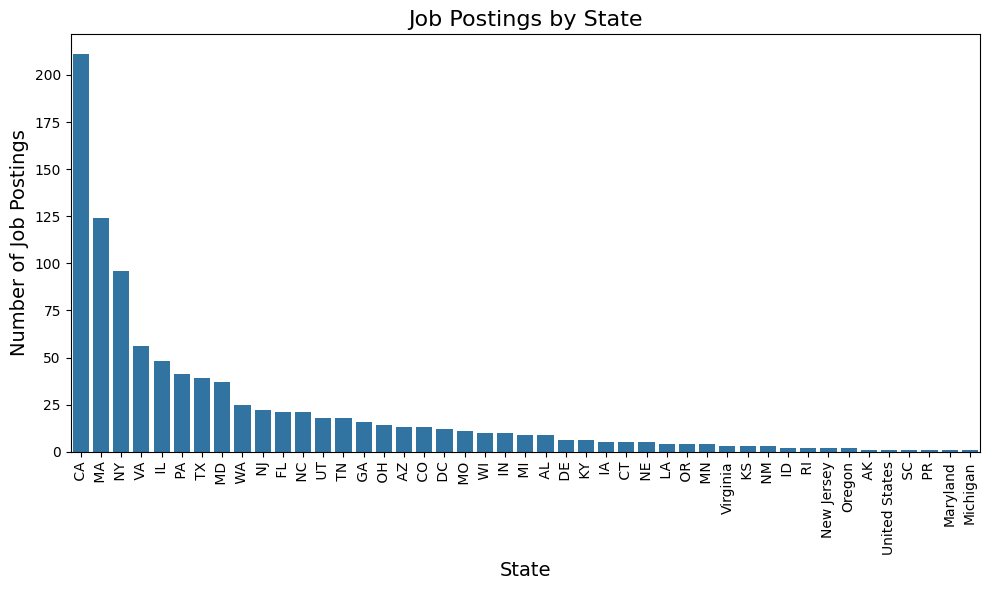

In [71]:
#sns.set(style='whitegrid')
#palette = sns.color_palette("Set2")
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='State', order = df['State'].value_counts().index)
ax.set_title('Job Postings by State', fontsize=16)
ax.set_xlabel('State', fontsize=14)
ax.set_ylabel('Number of Job Postings', fontsize=14)
plt.xticks(rotation=90)  
plt.tight_layout()  
plt.show()

### Despite regional variations, California, Massachusetts, and New York stand out as states with a notably greater prevalence of job postings.

<hr>

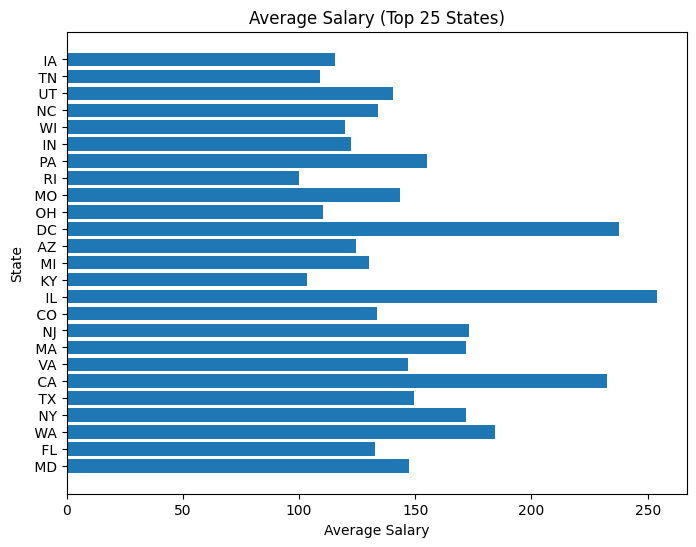

In [72]:
# Sort the DataFrame by Average Salary (descending order)
df_sorted = df.sort_values(by='Average Salary', ascending=False)

# Select the top 15 states
top_15_states = df_sorted['State'].unique()[:25]

# Filter the DataFrame to include only the top 25 states
df_filtered = df[df['State'].isin(top_15_states)]

plt.figure(figsize=(8, 6))
plt.barh(df_filtered['State'], df_filtered['Average Salary'])

# Add labels and title
plt.title('Average Salary (Top 25 States)')
plt.xlabel('Average Salary')
plt.ylabel('State')
plt.show()

### Despite general salary parity across states, Illinois demonstrates a notable trend towards higher compensation levels

<hr>

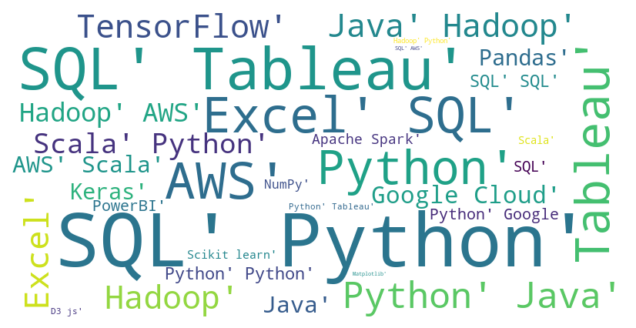

In [73]:
all_skills = " ".join(df['Extracted Skills'].tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_skills)

plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Based on the analysis, Python and SQL emerge as the most sought-after programming languages, while Scala and Java are less frequently required. Tableau stands out as the preferred data visualization tool, and AWS is the leading cloud service provider in the field.

<hr>

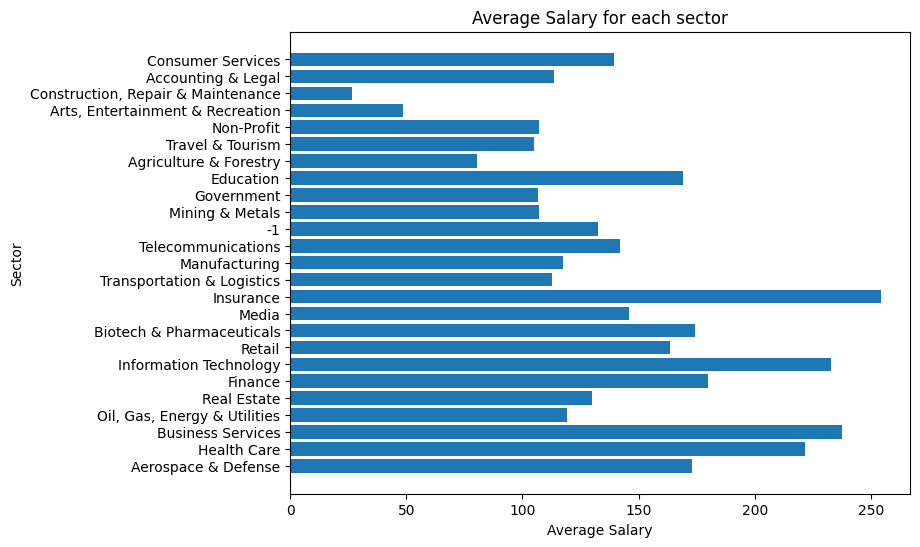

In [74]:
plt.figure(figsize=(8, 6))
plt.barh(df['Sector'], df['Average Salary'])
plt.title('Average Salary for each sector')
plt.xlabel('Average Salary')
plt.ylabel('Sector')
plt.show()

#### The average salaries in each sector are close. However, insurance, business services, IT and healthcare seem to pay more than the other sectors.

<hr>

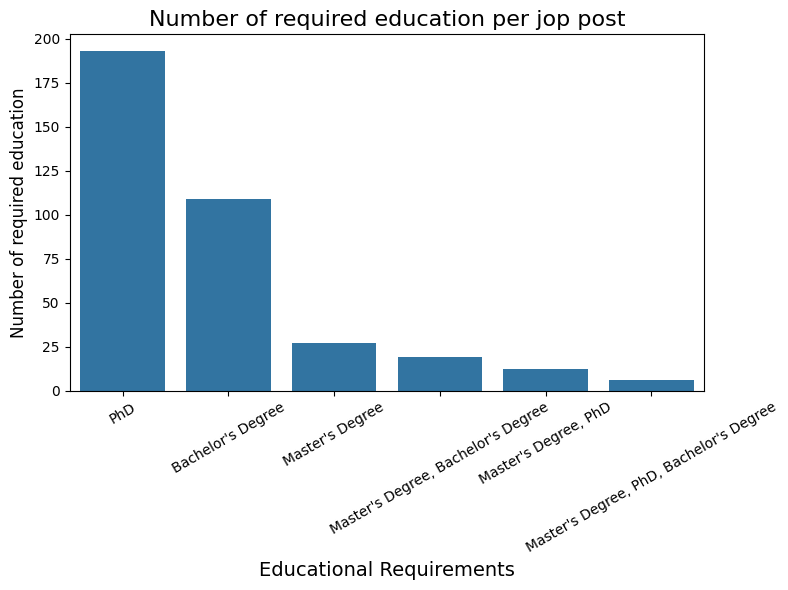

In [75]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='Educational Requirements', order = df['Educational Requirements'].value_counts().index)
ax.set_title('Number of required education per jop post', fontsize=16)
ax.set_xlabel('Educational Requirements', fontsize=14)
ax.set_ylabel('Number of required education', fontsize=12)
plt.xticks(rotation=30)  
plt.tight_layout()  
plt.show()

<hr>